In [11]:
from IPython.display import HTML

HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide();
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show();
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form''')

*Be sure to run the cell (by pressing SHIFT and ENTER at the same time) below to input the necessary python libraries to run this notebook*

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex, Markdown
import matplotlib as mpl
import ipywidgets as widgets
from ipywidgets import interact, interactive, Layout
import time
import matplotlib.image as mpimg

'''
Above, we are importing all the necessary modules in order to run the notebook. 
Numpy allows us to define arrays of values for our variables to plot them
matplotlib is what we use to create the figures
the display and widgets are to make the notebook look neat
''';



# Introduction

In this notebook, we will review some basics about polynomial functions such as
- the general form of a polynomial
- what terms make up a polynomial
- what defines the degree or order of a polynomial

We will then examine solving inequalities involving polynomials of degree 3 or less, both analytically and graphically, and breifly look over how to display the solutions on a number line, and how to represent solutions in interval notation. 

Finally, we will visualize how changing certain paramaters of polynomials can change the shape of it's graph, which results in a different interval satisfying a given inequality.

At the end of this notebook, there will be a small section covering some basics of  `python` syntax and coding. This optional section will show the user how to create simple plots of polynomials in `python`, which can be used to help solve some of the extra problems.



## Polynomials


A polynomial is a function comprised of constants and variables. The constants and variables can be related to each other  by addition, multiplication and exponentiation to a non-negative integer power ( https://en.wikipedia.org/wiki/Polynomial ). In this notebook, we will let $P(x)$ denote a general polynomial, and we will only deal with polynomials of a single variable $x$. 

In general, a polynomial is expressed as:

$P(x) = c_nx^n + c_{n-1}x^{n-1} + c_{n-2}x^{n-2} + ... + c_1x + c_0 = \Sigma^n_{k=0}c_kx^k$

where $c_i$ are *constant terms*, $x$ is the variable. The largest value of $n$ ( i.e. the largest exponent of the polynomial) determines the *degree* of the polynomial. For example, some polynomials of degree *three* ($n=3$) could be:</br>

$P(x) = x^3 + 2x^2 + 5x + 4$

$P(x) = 3x^3 + 8x $

$P(x) = x^3 + x^2 + 4$

Note how the number of terms **does not** effect the degree of the polynomial, only the value of the largest exponent does. 

A polynomial with degree *0* is called a *constant polynomial*, or just a *constant*. This is because of the mathematical identity

$x^0 = 1$,

so if we have any polynomail of degree 0, we have

$P(x) = c_1x^0 + c_2 = c_1 + c_2 = C$,

which of course is just a constant (i.e. some number, $C$).

While we will only be dealing with singe variable polynomials, it is worth noting that they can exist with *multiple variables*, i.e.

$P(x,y,z) = x^3 - xy^2 + z^6 -3x^2y^6z^4 +2$

In [ ]:
from ipywidgets import IntSlider, Label
#display(Latex('...')) will print the string in the output cell, in a nice font, and allows for easily inputing Math symbos and equations
display(Latex('From the list of funcitons below, check which ones are polynomials:'))

#define a series of checkboxes to test knowledge of  polynomial forms
a=widgets.Checkbox(
    value=False, #a false value meand unchecked, while a checked value will be "True'" 
    description=r"$x^2 + 5x - 8x^3$", #use r'' to make a raw stringas button description
    disabled=False
)

b=widgets.Checkbox(
    value=False,
    description=r'$x+3$')
c=widgets.Checkbox(
    value=False,
    description=r'$\sin(x) + \cos(x)$'
)
d=widgets.Checkbox(
    value=False,
    description=r'$x^5 - 2$',
    disabled=False
)

e=widgets.Checkbox(
    value=False,
    description=r'$\ln(x)$',
    disabled=False
)

f=widgets.Checkbox(
        value=False,
        description='$100$',
    disabled=False
)

#to actually display the buttons, we need to use the IPython.display package, and call each button as the argument
display(a)
display(b)
display(c)
display(d)
display(e)
display(f)

#create a button widget to check answers, again calling the button to display
button_check = widgets.Button(description="check")
display(button_check)

#a simple funciton to determine if user inputs are correct
def check_button(x):
    if a.value==True and b.value==True and c.value==False and d.value==True and e.value==False and f.value==True: #notebook will display 'correct'  message  IF (and only if) each of the boxes satisfy these value conditions 
        display(Latex("Correct - these are all polynomials! Let's move on to the next cell."))
    else: #if any of the checkboxes have the incorrect value, output will ask user to try again
        display(Latex("Not quite - either some of your selections aren't polynomials, or some of the options that you didn't select are. Check your answers again!"))

button_check.on_click(check_button)

    

# Intervals of Inequalities

## Interval Notation


Interval notation is a way of representing an interval of numbers by the two endpoints of the interval. Parentheses (  ) and brackets [  ] are used to represent whether the end points are included in the interval or not.  


For example, consider the interval between $-3$ and $4$, including $-3$, but **not** including $4$, i.e. $-3 \leq x < 4$. We can represent this on a number line as follows:

![intvl1.png](images/intvl1.png)

In **interval notation**, we would simply write: $[-3,4)$

If, however, the interval extended from $-3$ to **all** real numbers larger than $-3$, i.e. $-3 \leq x$, the number line would look like:

![intvl2.png](images/intvl2.png)

and our interval notation representation would be: $[-3, \infty)$, where $\infty$ (infinity) essentially means all possible numbers beyond this point.

Sometimes it is alos necessary to include multiple intervals. Consider an inequality in which the solution is $-3\leq x <0$ and $4 \leq x$. We can represent this solution in interval notation with the **union** symbol, which is just a capitol U, and means that both intervals satisfy the inequality: $[-3,0)$ U $[4,\infty)$

## Solving Inequalities

Given a polynomial $P(x)$, we can determine the range in which that polynomial satisfies a certain inequality. For example, consider the polynomial function

$P(x) = x^2 + 4x$.

For which values of $x$ is the ploynomial $P(x)$ less than three? Or, in a mathematical representations, on which interval is the inequality $P(x) \leq -3$ satisfied?

We can solve this algebraically, as follows:

1. Write the polynomial in standard form:   $x^2 + 4x + 3 \leq 0 $
    
2. Factor the polynomial:   $(x+1)(x+3) \leq 0$

What this new expression is essentiall telling us is that the product of two numbers (say $a=(x+1)$ and $b=(x+3)$) is equal to zero, or negative, i.e. $a\cdot b\leq 0 $. The only way this is possible is if $a=0$, $b=0$, or $a$ and $b$ have **opposite** signs. So the inequality $P(x) \leq -3$ is satisfied if:

- $(x+1) = 0$
- $(x+3) = 0$
- $(x+1)>0$ and $(x+3)<0$
- $(x+1)<0$ and $(x+3)>0$

From these possibilities, we can see the possible solutions are:

- $x=-1$
- $x=-3$
- $x>-1$ and $x<-3$
- $x<-1$ and $x>-3$
 
If we consider the solution $x>-1$ and $x<-3$, what are the possible values of $x$? If we say $x=1$ we satisfy the first inequality, but not the second, since $1$ is **not** less than $-3$. We can see that there is no possible x value that will result in  $(x+1)>0$ and $(x+3)<0$, so we can eliminate this as a possible solution.

However, we can find values of $x$ that satisfy $x<-1$ and $x>-3$. For example, $x=-2$

Thus, the solution to the inequality is $x=-1$, $x=-3$, and $x<-1$ and $x>-3$. We can plot this solution set on a number line:

![ex1.png](images/ex1.png)


or in *interval notation*, the solution is : **[-3,-1]**

## Let's work through an example together

<IPython.core.display.Latex object>

-4x^2+8x+96<=0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

x^2-2x-24


<IPython.core.display.Latex object>

x^2-2x-24>=0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

(x-6)(x+4)>=0


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

x>=6


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

x<=-4


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

(-infinity,-4]U[6,infinity)


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

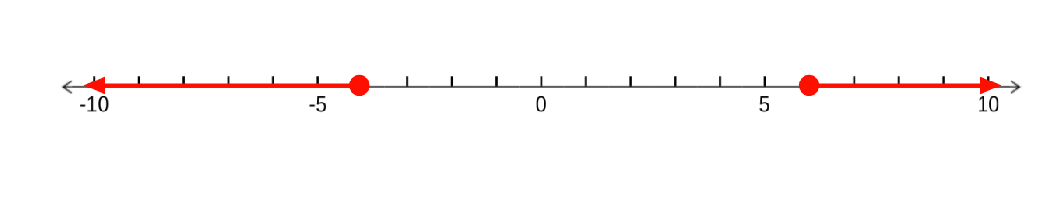

<IPython.core.display.Latex object>

In [2]:
%matplotlib inline
%matplotlib inline
try:
    display(Latex('Consider the inequality $(-x)(4x - 8) \leq -96$. Re-write the inequality in standard form (use the symbol ^ to indicate an exponent and <= for the inequality sign):'))

    std_form = '-4x^2+8x+96<=0'
    check_inpt = 0

    breaker = 0
    while check_inpt == 0:
        inpt_form = str(input())
        if inpt_form == std_form:
            check_inpt = 1
            display(Latex('Very good! The standard form of this inequality is $-4x^2+8x+96\leq0$.'))
        else:
            breaker += 1
            display(Latex('Not quite - try again! Hint: make sure there are no spaces between any of the characters.'))
            if breaker == 5:
                display(Latex("The correct answer is $-4x^2+8x+96\leq0$."))
                display(Latex("Let's try the next step!"))
                check_inpt = 1
                break
            else:
                continue

    
    if check_inpt == 1:
        breaker = 0
        display(Latex('We can simplify this further by reducing the leading coeffecient to 1. We do this by simply dividing both sides by $-4$. If we do this, what does our expression become then?'))
        simplify_form = 'x^2-2x-24>=0'   
        while check_inpt == 1:
            inpt_simpl = str(input())
            if inpt_simpl == simplify_form:
                check_inpt = 2
                display(Latex("Excellent! It's important to remember that if we divide or multiply an inequality by a negative number, we flip the inequality sign."))
            elif inpt_simpl ==  'x^2-2x-24<=0':
                breaker += 1 
                display(Latex('Almost, but not quite! Remeber that if we divide or multiply an inequality by a negative number, we flip the inequality sign.'))
                if breaker == 5:
                    display(Latex("The answer we're looking for is $x^2 - 2x - 24 \geq 0$"))
                    display(Latex("Let's go on to the next step in this problem."))
                    check_inpt = 2
                    break
                else:
                    continue
            else:
                breaker += 1
                display(Latex('Not quite - try again! Hint: make sure there are no spaces between any of the characters.'))
                if breaker == 5:
                    display(Latex("The answer we're looking for is $x^2 - 2x - 24 \geq 0$"))
                    display(Latex("Let's go on to the next step in this problem."))
                    check_inpt = 2
                    break
                else:   
                    continue

    if check_inpt == 2:
        breaker = 0
        display(Latex('The next step is to factor our simplified polynomial expression: $x^2 - 2x - 24 \geq 0$.'))
        display(Latex('Input the factored expression below:'))
        factored_1 = '(x-6)(x+4)>=0'
        factored_2 = '(x+4)(x-6)>=0'
        while check_inpt == 2:
            inpt_factor = str(input())
            if inpt_factor == factored_1 or inpt_factor == factored_2:
                check_inpt = 3
                display(Latex('Correct!'))
            else:
                breaker += 1
                display(Latex('Not quite - try again!'))
                if breaker == 5:
                    display(Latex("If we factor this expression, we should find $(x-6)(x+4)\geq 0$."))
                    display(Latex("Before you move on, make sure you understand how to get this answer!"))
                    check_inpt = 3
                    break
                else:
                    continue
 
    if check_inpt == 3:
        breaker = 0
        display(Latex('Since we have $(x-6)(x+4)\geq 0$, there are the two sign possibilities; either'))
        display(Latex('$1. ~ (x-6)\geq 0$ and $(x+4)\geq 0$'))
        display(Latex('or'))
        display(Latex('$2. ~ (x-6)\leq 0$ and $(x+4)\leq 0$'))
        display(Latex('Consider expression $1.$ Can you see what solution satisfies both $(x-6)\geq 0$ and $(x+4)\geq 0$? Enter your answer below in the form "x>= _"'))
        while check_inpt == 3:
                intvl_1 = str(input())
                if intvl_1 == 'x>=6':
                    check_inpt = 4
                    display(Latex('Very good! Since we are looking for values of $x$ that are larger than 6 and -4, and $6>-4$, the first expresssion gives us one simple solution interval: $x\geq6$'))
                else:
                    breaker += 1
                    display(Latex('Not quite - try again!'))
                    if breaker == 5:
                        display(Latex("From expression 1, we should find that $x\geq6$, since any number greater than 6 is also larger than -4!"))
                        check_inpt = 4
                        break
                    else:
                        continue

    if check_inpt == 4:
        breaker = 0
        display(Latex('Now consider expression $2$ What is the interval satsfying these inequalities?'))
        while check_inpt == 4:
            intvl_2 = str(input())
            if intvl_2 == 'x<=-4':
                check_inpt = 5
                display(Latex('Very good! Since we are looking for values of $x$ that are less than -4 and6 and $6>-4$, this expresssion also gives us one simple solution interval: $x\leq-4$'))
            else:
                breaker += 1
                display(Latex('Not quite - try again!'))
                if breaker == 5:
                    display(Latex("The interval from expression 2 is $x\leq-4$."))
                    check_inpt = 5
                    break
                else:
                    continue

    if check_inpt == 5:
        breaker = 0
        display(Latex('So, what is our final solution interval for the inequality $(-x)(4x - 8) \leq -96$? Enter your answer in interval notation, using the following notations if necessary:'))
        display(Latex(' Union symbol: U'))
        display(Latex('+/- Infinity : +/-infinity'))
        final_intvl ='(-infinity,-4]U[6,infinity)'
        while check_inpt == 5:
            final_inpt = str(input())
            if final_inpt == final_intvl:
                check_inpt = 6
                display(Latex('Excellent!'))
                display(Latex('The solution of the inequality is: $(-\infty, -4]$U$[6,\infty)$'))
                display(Latex('On a number line, this solution looks like'))
                img = mpimg.imread('images/ex_soln.png')
                fig, ax = plt.subplots(figsize=(18, 3))
                imgplot = ax.imshow(img,  aspect='auto')
                ax.axis('off')
                plt.show()
                display(Latex("Let's move on to solving inequalities graphically! "))
            else:
                breaker += 1
                display(Latex('Not quite - try again!'))
                if breaker == 5:
                    display(Latex("The solution of the inequality is: $(-\infty, -4]$U$[6,\infty)$"))
                    display(Latex('On a number line, this solution looks like'))
                    img = mpimg.imread('images/ex_soln.png')
                    fig, ax = plt.subplots(figsize=(18, 3))
                    imgplot = ax.imshow(img,  aspect='auto')
                    ax.axis('off')
                    plt.show()
                    display(Latex("If you struggled with any of these steps, try going back and starting this example again, and make sure you understand all the steps involved!"))
                    display(Latex("Otherwise, let's move on to solving inequalities graphically! "))
                    break
                else:
                    continue

                
except KeyboardInterrupt:
    pass

## Graphical visualization of inequality solutions

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Javascript object>


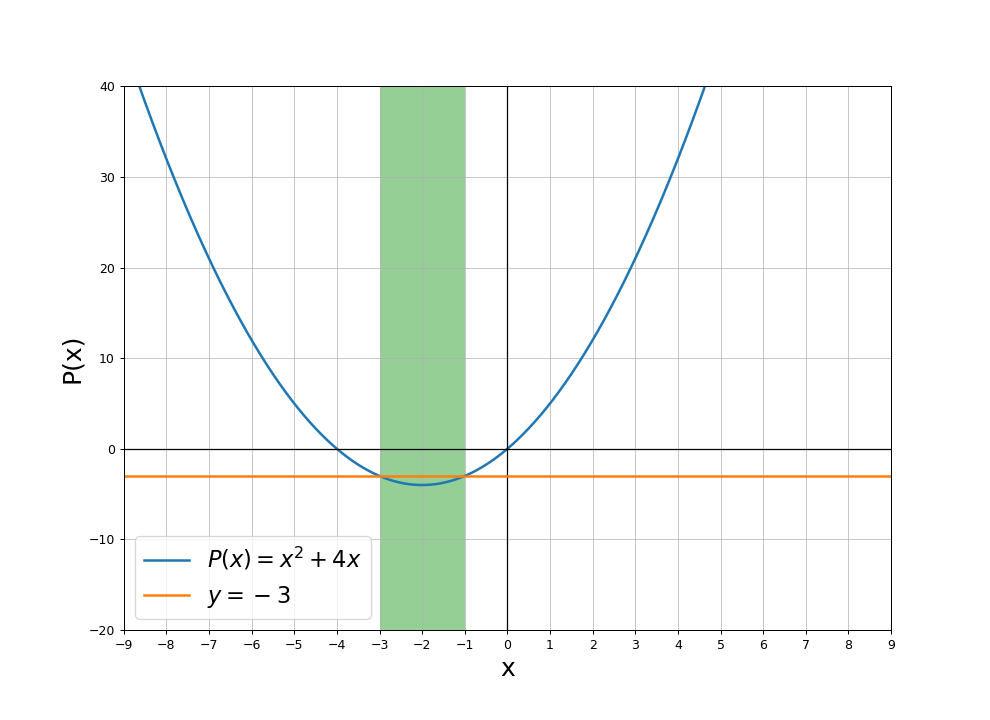

<IPython.core.display.Latex object>

Button(description='draw!', style=ButtonStyle())

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Button(description='shade', style=ButtonStyle())

<IPython.core.display.Latex object>

In [4]:
%matplotlib notebook
%matplotlib notebook


display(Latex('Here is a graph of the polynomial $P(x) = x^2 + 4x$'))
display(Latex("Let's try to solve where this polynomial is $\leq -3$, or  $x^2 + 4x \leq -3$."))
display(Latex("Let's draw a line at $y=-3$ to help visualize this. (press the 'draw' button)"))

x = np.linspace(-10,10,1000); #define a vector space for the variable x

#this block will create an interactive figure of the polynomial
plt.figure(figsize=(11,8)) #define the figure window size
plt.plot(x,x**2 + 4*x, linewidth=2, label=r'$P(x) = x^2 + 4x$'); #plot the polynomial as a funciton of x
plt.ylabel('P(x)', fontsize=20) #label the axes
plt.xlabel('x', fontsize=20)
plt.grid(alpha = 0.7) #place a grid on the figure for readability; alpha defines the opacity
plt.xticks(np.arange(-10,11)) #define the xticks for easier reading
plt.ylim([-20,40]) #adjust the limits of the y and x axes of the figure for readability
plt.xlim([-9,9])
plt.plot([-75,75],[0,0],'k-',alpha = 1,linewidth = 1) #plot solid lines along origin for easier reading
plt.plot([0,0],[-75,75],'k-',alpha = 1,linewidth = 1)
plt.legend(loc='best', fontsize = 18) #add a legend 
display(Latex('You can pan around the graph by clicking the fourth button (looks like a cross) and dragging the mouse around. You can zoom in to get a better look at the zeros by clicking the white square button, and making a rectangle on the plot where you want a closer look. To reset the graph back to normal, press the "home" button.'))


#create a button to draw a line at y=0 when clicked
button = widgets.Button(description="draw!")

#function to produce the plot when the button is clicked
def on_button_clicked(b):
    plt.plot(x,np.ones(len(x))*-3, linewidth=2, label = r'$y = -3$'); #plot the y=0 line
    plt.legend(loc='best', fontsize = 18) #add a legend 
    display(Latex('Can you see where the inequality is satisfied?'))
    display(Latex("Zoom in (with the 'box' icon) to find where the lines intersect. We can see that they are the same values as we calculated above."))
    display(Latex("Pressing the 'shade' button will shade in the interval where the inequailty is satisfied on the graph"))
    display(button2) #display a second button after the line is drawn

# create a button to shade the satisfied interval on the figure
button2 = widgets.Button(description='shade')

#function to shade the region between x = -3 and x= -1 when button 2 is clicked
def shade_click(b):
    plt.axvspan(-3,-1,facecolor='#2ca02c', alpha=0.5)
    display(Latex("We can see that the interval for which $P(x) \leq -3$ is again [-3,-1], agreeing with our algebraic solution."))

display(button) #display the first button below the figure window

button.on_click(on_button_clicked)
button2.on_click(shade_click)






# Changing Parameters

## Constant term

The **constant term** of a polynomial is the term in which the variable does not appear (i.e. the degree $0$ term). For example, the constant term for the polynomial 

$P(x) = x^3 + 2x^2 + 5x + 4$,</br>

is $4$.

Let's look at how changing the constant term changes the graph of the polynomial. We will consider the same polynomial as before, but this time we will let $k$ be an arbitrary value for the constant term. 



In [5]:
%matplotlib inline 
#we're using sliders to change figures in this cell, which works more smoothly with 'inline' figures instead of 'notebook', so we switch to inline for this cell

display(Latex('Adjust the value of $k$ using the slider. What do you notice about the graph as the value changes?'))

x = np.linspace(-10,10, 1000)

#define function to create a graph of a polynomial
def Plot_poly(k=0): #we make the python function a function of the variable 'k', which we will use as the constant term in the polynomial
    plt.figure(figsize=(11,8))
    plt.plot(x,x**3 + 2*x**2 + 5*x + k, linewidth = 2) #here is the variable k
    plt.title(r'Graph of $P(x) = x^3 + 2x^2 + 5x + k$', fontsize = 20)
    plt.ylabel('P(x)', fontsize=20)
    plt.xlabel('x', fontsize=20)
    plt.grid(alpha = 0.7) 
    plt.xticks(np.arange(-10,11))
    plt.ylim([-20,40])
    plt.xlim([-9,9])
    plt.plot([-75,75],[0,0],'k-',alpha = 1,linewidth = 1)
    plt.plot([0,0],[-75,75],'k-',alpha = 1,linewidth = 1)
    plt.show()
    
interact(Plot_poly,k=(1,20)); #use the IPython interact function to create a slider to adjust the value of 'k' for the plot

display(Latex('Try doing the same with other polynomials. Is there a similar, or different behaviour?'))


<IPython.core.display.Latex object>

interactive(children=(IntSlider(value=1, description='k', max=20, min=1), Output()), _dom_classes=('widget-interact',))

<IPython.core.display.Latex object>

In [ ]:
try:
    display(Latex('Provide the order of polynomial you wish to plot (between 1 and 3):'))
    poly_order = int(input('degree:'))

    if poly_order == 1:
        display(Latex('Provide a value for $a$ in the polynomial $P(x) = ax + k$:'))    
        a = int(input('a='))
        custom_poly = a * x #define the polynomial based on the order and coeffecient(s) provided. we leave out the contant term here and add it in the custom_plot function
        def custom_plot(k=0):
            plt.figure(figsize=(11,8))
            plt.plot(x,custom_poly + k, linewidth=2) #plot the polynomial with the constant term k 
            plt.ylabel('P(x)', fontsize=20)
            plt.xlabel('x', fontsize=20)
            plt.grid(alpha = 0.7) 
            plt.xticks(np.arange(-10,11))
            plt.ylim([-20,40])
            plt.xlim([-9,9])
            plt.plot([-75,75],[0,0],'k-',alpha = 1,linewidth = 1)
            plt.plot([0,0],[-75,75],'k-',alpha = 1,linewidth = 1)
            plt.title('Graph of polynomial $P(x) ='+str(a) + 'x+ k$', fontsize=20)
            plt.show()
        def graph(b):
            interact(custom_plot,k=(-10,10)) #interact with the graph via slider that changes value of k
        graph_button = widgets.Button(description = 'Graph')    
        display(graph_button)
        graph_button.on_click(graph)

    ###the same structure for order 2 and 3 below

    if poly_order == 2:
        display(Latex('Provide a value for $a$ and $b$ in the polynomial $P(x) = ax^2 +bx + k$:'))
        a = int(input('a='))
        b = int(input('b='))
        custom_poly = a * x**2 + b*x
        def custom_plot(k=0):
            plt.figure(figsize=(11,8))
            plt.plot(x,custom_poly + k, linewidth=2)
            plt.ylabel('P(x)', fontsize=20)
            plt.xlabel('x', fontsize=20)
            plt.grid(alpha = 0.7) 
            plt.xticks(np.arange(-10,11))
            plt.ylim([-20,40])
            plt.xlim([-9,9])
            plt.plot([-75,75],[0,0],'k-',alpha = 1,linewidth = 1)
            plt.plot([0,0],[-75,75],'k-',alpha = 1,linewidth = 1)
            plt.title('Graph of polynomial $P(x) ='+str(a) + 'x^2 +' + str(b) + 'x + k$', fontsize=20)
            plt.show()
        def graph(b):
            interact(custom_plot,k=(-10,10))
            display(Latex("Click somewhere in this cell and press SHIFT and ENTER to run the cell again if you would like to try graphing a different polynomial."))
        graph_button = widgets.Button(description = 'Graph')    
        display(graph_button)
        graph_button.on_click(graph)

    if poly_order == 3:
        display(Latex('Provide a value for $a$, $b$, and $c$ in the polynomial $P(x) = ax^3 +bx^2 + cx + k$:'))
        a = int(input('a='))
        b = int(input('b='))
        c = int(input('c='))
        custom_poly = a * x**3 + b*x**2 + c*x
        def custom_plot(k=0):
            plt.figure(figsize=(11,8))
            plt.plot(x,custom_poly + k, linewidth=2)
            plt.ylabel('P(x)', fontsize=20)
            plt.xlabel('x', fontsize=20)
            plt.grid(alpha = 0.7) 
            plt.xticks(np.arange(-10,11))
            plt.ylim([-20,40])
            plt.xlim([-9,9])
            plt.plot([-75,75],[0,0],'k-',alpha = 1,linewidth = 1)
            plt.plot([0,0],[-75,75],'k-',alpha = 1,linewidth = 1)
            plt.title('Graph of polynomial $P(x) ='+str(a) + 'x^3 +' + str(b) + 'x^2 + ' + str(c) + 'x + k$', fontsize=20)
            plt.show()
        def graph(b):
            interact(custom_plot,k=(-10,10))
            display(Latex("Click somewhere in this cell and press SHIFT and ENTER to run the cell again if you would like to try graphing a different polynomial."))
        graph_button = widgets.Button(description = 'Graph')    
        display(graph_button)
        graph_button.on_click(graph)

except KeyboardInterrupt:
    pass

In the next graph, we will quantify how the constant term can change the interval satisfying an inequality. 

<IPython.core.display.Latex object>

x1=-3
x2=-1


<IPython.core.display.Latex object>

x1=1
x2=3


<IPython.core.display.Latex object>

Button(description='Show intercepts', style=ButtonStyle())

<IPython.core.display.Javascript object>


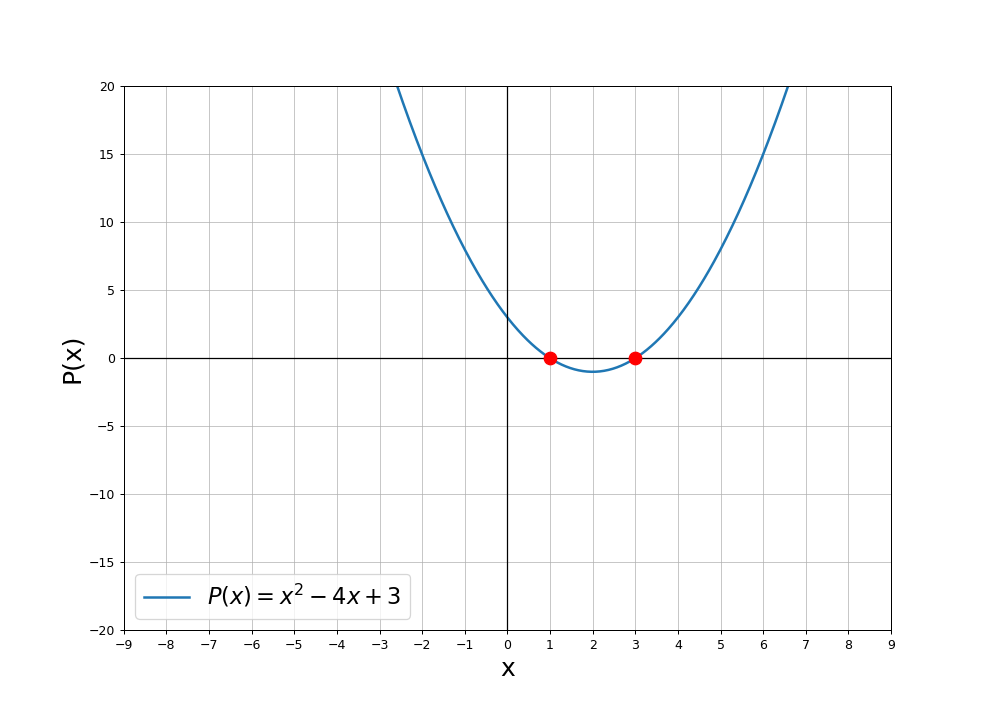

<IPython.core.display.Latex object>

Button(description='Change Constant', style=ButtonStyle())

In [6]:
%matplotlib notebook

try:
    display(Latex("Where are the x intercepts for the polynomial $x^2-4x+3$?"))

    int_1 = str(1)
    int_2 = str(3)

    def click_show(b):
        plt.figure(figsize=(11,8))
        plt.plot(x,x**2  - 4*x + 3, linewidth=2, label=r'$P(x) = x^2 -4x+3$');
        plt.plot([-75,75],[0,0],'k-',alpha = 1,linewidth = 1)
        plt.plot([0,0],[-75,75],'k-',alpha = 1,linewidth = 1)
        plt.plot(3,0,'ro',markersize=10)
        plt.plot(1,0,'ro',markersize=10)
        plt.ylabel('P(x)', fontsize=20)
        plt.xlabel('x', fontsize=20)
        plt.grid(alpha = 0.7)
        plt.xticks(np.arange(-10,11))
        plt.ylim([-20,20])
        plt.xlim([-9,9])
        plt.legend(loc='best', fontsize = 18)
        plt.show()
        display(Latex('Based on the previous cell, what do you think will happen if we change the constant term from $3$ to $-3$? Press the button to find out if you are correct.'))
        display(change_c)

    def change_const(b):
        plt.plot(x,x**2 - 4*x - 3, linewidth=2, label=r'$P(x) = x^2 -4x-3$')
        plt.plot(2-np.sqrt(7),0,'yo',markersize=10)
        plt.plot(2+np.sqrt(7),0,'yo', markersize=10)
        plt.legend(loc='best', fontsize = 18)
        display(Latex('As we can see, changing the constant term shifts the graph of a polynomial up or down. This results in different x-intercepts, and therefore a different interval. '))

        
    check = 0
    breaker = 0
    while check == 0:
        guess_int_1 = str(input('x1='))
        guess_int_2 = str(input('x2='))
        show_int = widgets.Button(description ='Show intercepts')
        if guess_int_1 == int_1 and guess_int_2 == int_2 or guess_int_1 == int_2 and guess_int_2 == int_1:
            display(Latex('Correct! Press the button to display the points on the graph above'))
            display(show_int)
            check = 1
        else:
            breaker += 1
            display(Latex('Try Again!'))
            if breaker == 3:
                display(Latex("Hint: Factor the polynomial. What are the x intercepts?"))
            elif breaker == 5:
                display(Latex("The correct intercepts are $x=1$ and $x=3$. Press the button to display the points on the graph above"))
                display(show_int)
                break
            
    show_int.on_click(click_show)

    change_c = widgets.Button(description = 'Change Constant')

    change_c.on_click(change_const)

except KeyboardInterrupt:
    pass


Another way to think about this is that changing the constant term is the same as solving for a different interval of inequality. Take, for example the polynomials we just used above.

We know that 

$x^2-4x+3 \leq 0$ 

is **not** the same as 

$x^2-4x-3\leq 0$.

However, consider a new inequality:

$x^2 - 4x - 3 \leq -6$.

If we simplify this expression, we find

$x^2 - 4x +3 \leq 0$

which is indeed equivalent to the first polynomial (plotted in blue in the cell above).

# Extra Problems

## Practice solving graphically

First, we will practice how to solve inequalities graphically. Below is a plot of the polynomial $P(x) = x^3 - 1x^2 - 22x + 40$. Using the graph, find the values of the three x intercepts. Based on this, determine the interval where $P(x) \leq 0 $.

This can method can be used to solve almost any polynomial inequality, provided that the x-intercepts are rational numbers which can be easily read off of the axes of the graph.

In [ ]:
%matplotlib inline

def slider(x1,x2,x3):
    xx = np.linspace(-10,10,300)
    p1 = plt.figure(1,figsize = (11,8))
    hold = True
    plt.plot(xx,xx**3 - 1*xx**2 - 22*xx + 40, linewidth = 2, label = r'$P(x) = x^3 - 1x^2 - 22x + 40$')
    plt.axhline(y=0, color = 'k', linewidth=1)
    plt.axvline(x=0, color = 'k', linewidth=1)
    plt.plot(x1,0,'ro',markersize=10)
    plt.plot(x2,0,'mo',markersize=10)
    plt.plot(x3,0,'go',markersize=10)
    if x1 == -5 and x2 == 2 and x3 == 4:
        plt.text(-7,20,'VERY GOOD!', fontsize = 25, fontweight = 'bold',color = 'r')
        plt.fill_between(xx,xx**3 - 1*xx**2 - 22*xx + 40,np.zeros(len(xx)), where=xx**3 - 1*xx**2 - 22*xx + 40<0, interpolate = True, alpha=0.5, color='g' )
        display(Latex('What interval then satisfies $P(x) \leq 0$?'))
        intvl_1=widgets.Checkbox(
        value=False, 
        description=r'$[-5,4]$', 
        disabled=False
        )
        intvl_2=widgets.Checkbox(
            value=False,
            description=r'$[-5,3]U[4,\infty)$',
            disabled=False
        )
        intvl_3=widgets.Checkbox(
            value=False,
            description=r'$[-5,2]$',
            disabled=False
        )
        intvl_4=widgets.Checkbox(
            value=False,
            description=r'$(-\infty,-5]U[2,4]$',
            disabled=False
        )
        display(intvl_1)
        display(intvl_2)
        display(intvl_3)
        display(intvl_4)
        
        def check_button2(x):
            if intvl_2.value == False and intvl_1.value==False and intvl_3.value==False and intvl_4.value==True:
                display(Latex('Correct!'))
            else: 
                display(Latex("Not quite - Check your answer again!"))
                
        button_check2 = widgets.Button(description="check")
        display(button_check2)
        button_check2.on_click(check_button2)
        
    plt.xlabel('$x$',fontsize = 14)
    plt.ylabel('$y$',fontsize = 14)
    plt.grid(alpha = 0.7)
    plt.xticks(np.arange(-10,11))
    plt.ylim([-75,75])
    plt.xlim([-9,9])
    plt.legend(loc = 'best', fontsize = 18)
    plt.show()
    
sl = interactive(slider, x1=(-10,10,1), x2=(-10,10,1), x3=(-10,10,1)) 
display(sl)


## Solve the inequalitites

In the next cell, we have a function that will generate a random polynomial of degree 2 or 3. Using the analytic steps shown above, try to solve the intervals of inequalities for a few polynomials. Since we can always rearrange the polynomial into standard form, without loss of generality we can always take the inequality to be $\leq 0 $ or $\geq 0 $. Re-run this function as many times as you would like, until you are comfortable with solving polynomial inequalities.

If you have trouble solving the inequality analytically, you can try to find the solution graphically, following the method in the cell above. At the bottom of this notebook, there will be some instructions on how to make basic plots with Python. Follow these steps and try to solve the inequality.

**Note**: you will need to scroll to the top of the notebook and press the '**show code**' button to be able to write your own code in a cell.


In [8]:
%matplotlib notebook 
%matplotlib notebook 

def find_interval():
    display(Latex('Provide order of polynomial:'))
    poly_order = int(input())
    check_interval = 0
    button_clicked = 0
    
    if poly_order > 3:
        display(Latex('Order of polynomial must be less than or equal to 3'))
        display(Latex('Provide order of polynomial:'))
        poly_order = input()
        
    if poly_order == 3:    
        C = np.random.randint(-5,5,poly_order)
        C1 = -1*np.sum(C)
        C2 = C[0]*C[1] + C[2]*(C[0]+C[1])
        C3 = -1*C[0]*C[1]*C[2]
        C11=C1
        C22=C2
        C33=C3
        display(Latex('Find the interval where $P(x) \geq 0 $ for $P(x)$ as given below:'))
        if C1>0:
            str1 = '+' + str(C11) + 'x^2'
        elif C1== 0:
            str1 = ''
        else:
            str1=  str(C11) + 'x^2'
        if C2>0:
            str2 = '+' + str(C22) + 'x'
        elif C2== 0:
            str2=''
        else:
            str2= str(C22) + 'x'
        if C3>0:
            str3 = '+' + str(C33)
        elif C3== 0:
            str3=''
        else:
            str3= str(C33)
        a = 'P(x)= x^3' + str1 + str2 + str3
        display(Math(a))
        def poly(x):
            return x**3 + C1*x**2 + C2*x + C3
        
    if poly_order == 2:
        C = np.random.randint(-5,5,poly_order)
        C1 = -1*np.sum(C)
        C2 = C[0]*C[1]
        C11=C1
        C22=C2
        if C1>0:
            str1 = '+' + str(C11) + 'x'
        elif C1== 0:
            str1 = ''
        else:
            str1=  str(C11) + 'x'
        if C2>0:
            str2 = '+' + str(C22)
        elif C2== 0:
            str2=''
        else:
            str2= str(C22) 
        display(Latex('Find the interval where $P(x) \geq 0 $ for $y$ as given below:'))
        a = 'P(x) = x^2 ' + str1 + str2
        display(Math(a))
        def poly(x):
            return x**2 + C1*x + C2
    
    Max = max(C)
    Min = min(C)
    M = [Min, Max]
    V = np.sort(C)
    eps = 0.1
    
    if poly_order ==3:
        v = V[1]
        if Max == Min and poly(Max +eps) > 0:
                          interval = '['+str(Max)+',infinity)'
        if Max == Min and poly(Max +eps) < 0:
                          interval = '(-infinity,' + str( Max)+']'
                      
        if poly(Max + eps) >0:
#         interval = '(' + str(Max) + ', infinity)'
            if v !=  Max and v!= Min:
                      interval = '['+str(Min) + ',' + str(v) + ']U[' + str(Max) + ',infinity)'
            if v == Max:
                          interval = '[' + str(Min) + ',infinity)'
            if v== Min:
                          interval = '[' + str(Max) + ',infinity)'
    
        if poly(Max + eps) <0:
#         interval = '(-infinty,' + str(Min) + ')'
            if v != Max and v != Min:
                          interval = '(-inifinity,' + str(Min) + ']U['+str(v) + ','+str(Max) + ']'
            if v == Max:
                          interval = '(-infinity,' + str( Max) + ']'
            if v == Min:
                          interval = '(-infinity,' + str(Min) + ']'
                    
    if poly_order == 2:
            if Max == Min and poly(Max+eps)>0:
                interval = '(-infinity,infinity)'
            elif poly(Max+eps)<0:
                interval = '['+str(Min)+','+str(Max)+']'
            elif poly(Max + eps)>0:
                interval = '(-infinity,'+str(Min)+']U[' + str(Max)+',infinity)'
            else:
                interval = str(Max)    

#     print(interval)
    breaker = 0
    while  check_interval == 0:
        display(Latex('Input answer in interval notation (i.e. [-4,-1]U[5,infinity) ):'))
        interval_input = str(input())
        if interval_input == interval:
            check_interval = 1
            display(Latex("Correct! Here's a visualization of the solution:"))
            x=np.linspace(-100,100,10000)
            y= poly(x)
            plt.figure(figsize=(11,8))
            plt.plot(x,y, linewidth = 2, label = '$' + str(a) + '$')
            plt.xlabel('$x$',fontsize = 14)
            plt.ylabel('$y$',fontsize = 14)
            plt.axhline(y=0, color = 'k', linewidth=1)
            plt.axvline(x=0, color = 'k', linewidth=1)
            plt.grid(alpha = 0.7)
            plt.xticks(np.arange(-10,11))
            plt.ylim([-75,75])
            plt.xlim([-9,9])
            plt.legend(loc = 'best', fontsize = 18)
            plt.fill_between(x,y,0, where=y>0, interpolate=True, alpha = 0.5, color='g')
        else:
            breaker += 1
            display(Latex("That's not quite right, try again." ))
            if breaker == 3:
                display(Latex("Try plotting the polynomial to help you visualize the solution!"))
            elif breaker == 5:
                display(Latex("The solution interval for this problem is" + str(interval)))
                display(Latex("Run this cell again to try another problem!"))
                x=np.linspace(-100,100,10000)
                y= poly(x)
                plt.figure(figsize=(11,8))
                plt.plot(x,y, linewidth = 2, label = '$' + str(a) + '$')
                plt.xlabel('$x$',fontsize = 14)
                plt.ylabel('$y$',fontsize = 14)
                plt.axhline(y=0, color = 'k', linewidth=1)
                plt.axvline(x=0, color = 'k', linewidth=1)
                plt.grid(alpha = 0.7)
                plt.xticks(np.arange(-10,11))
                plt.ylim([-75,75])
                plt.xlim([-9,9])
                plt.legend(loc = 'best', fontsize = 18)
                plt.fill_between(x,y,0, where=y>0, interpolate=True, alpha = 0.5, color='g')
                check_interval = 1
            else:
                continue
        


In [9]:
try:
    find_interval()
except KeyboardInterrupt:
    pass

<IPython.core.display.Latex object>

3


<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

## Plotting in Python


 To create a simple plot of a polynomial, we can run the following code:

First, we have to import the necessary libraries to create the plot. We can call the matplotlib library in the code by using the 'plt.' prefix. 

We will use the Python `matplotlib` library to plot the polynomials.

The` numpy` library is used to create an object called a 'vector' -- we use this to plot the  polynomial over some range of x:

```python
import matplotlib.pyplot as plt

import numpy as np 
```

From the `numpy` library, we call the 'linspace' function, which creates a list of linearly spaced numbers. The numbers in the brackets are the starting number, the final number, and the number of points between the two. In this case, we create a list of 1000 numbers equally spaced between `-10` and `10`. We will define this list as the variable `x` by typing `x=` before we call the `numpy` function:

```python
x = np.linspace(-10,10,1000) 
```

Now we can use `matplotlib` functions to create the graph. Calling the `figure()` function creates a figure box to make the graph. We can enter arguments in the brackets to specify the size of the figure window to make it easier to read. To actually draw the graph, we call `plot(x,y)`, draws the graph of y as a function of x.

```python
plt.figure(figsize=(11,8)) 

plt.plot(x,y)  
```

When you write the code for yourself, instead of typing 'y' in the brackets, write out the actual polynomial you wish to plot. For example, if we wanted to plot $y = x^2 + 2x - 3$, our code may look like:

```python
plt.figure(figsize=(11,8)) 

plt.plot(x,x**2 + 2*x - 3)  
```

Notice the *syntax* of the polynomial. Double asterisks `**` are used to exponentiate variables (i.e. $x^2$ = `x**2`), while a single asterisk `*` means multiplication in Python. Addition and subtraction are the usual `+` and `-` symbols.

We can make the intercepts easier to read by placing a grid on the figure with

```python
plt.grid(alpha=0.7)
```
and making the origin lines solid by using

```python
plt.axhline(y=0, color = 'k', linewidth=1)

plt.axvline(x=0, color = 'k', linewidth=1)
```



In the cell below, write out this code block, entering the polynomial you wish to solve as 'y'.

# Conclusion


 In this notebook, we reviewed some basics of polynomial functions:
 - what is the general form of a polynomial
 - what are some examples of polynomials
 - what defines the order (or degree) of a polynomial
 - what is the constant term of a polynomial, and what is it's role on the graph of a polynomial
 
We explored who to solve inequalities involving polynomials analytically, and demonstrated how we can search for solutions graphically as well.

You should also be familiar with some basic Python syntax and plotting routines to create simple plots of polynomial functions with the `matplotlib` library.